Importing necessary libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import pandas as pd

Loading the data

In [2]:
data=pd.read_csv('Mall_Customers_cleaned.csv')

Making Customer clusters based on the Annual Income and Spending Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


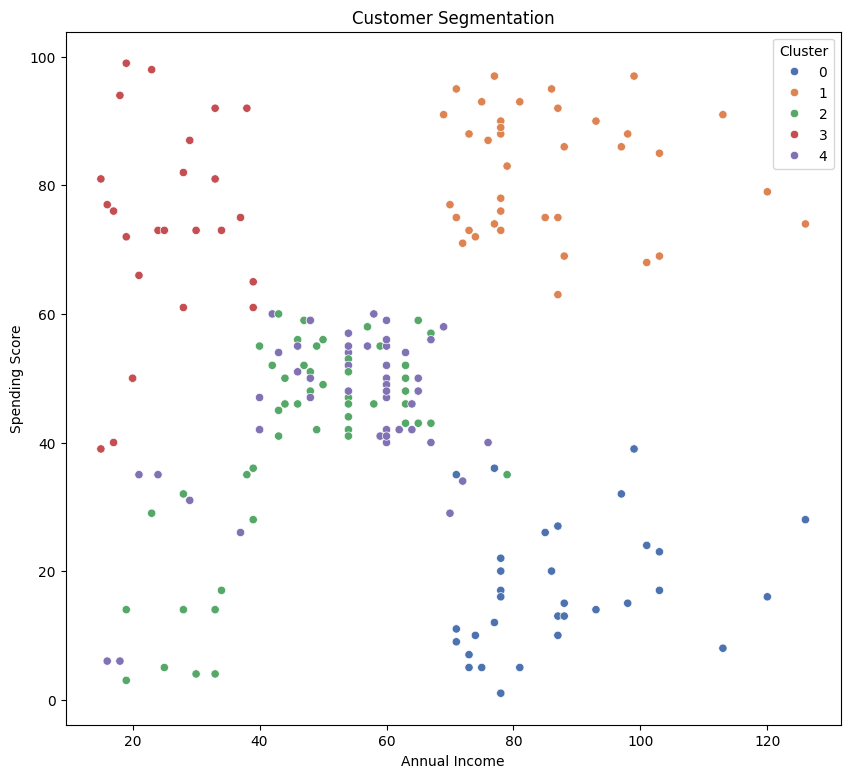

In [3]:
#Feature Selection
features=data[['Annual Income','Spending Score','Age']]

#Standardizing the feature
scaler=StandardScaler()
scaled_features = scaler.fit_transform(features)

#Applying K-Means clustering
kmeans = KMeans(n_clusters = 5, random_state = 42)
data['Cluster']=kmeans.fit_predict(scaled_features)

#Evaluating cluster quality
plt.figure(figsize=(10,9))
sns.scatterplot(data=data,x='Annual Income',y='Spending Score',hue='Cluster',palette='deep')
plt.title('Customer Segmentation')
plt.show()

Plotting the average of each cluster

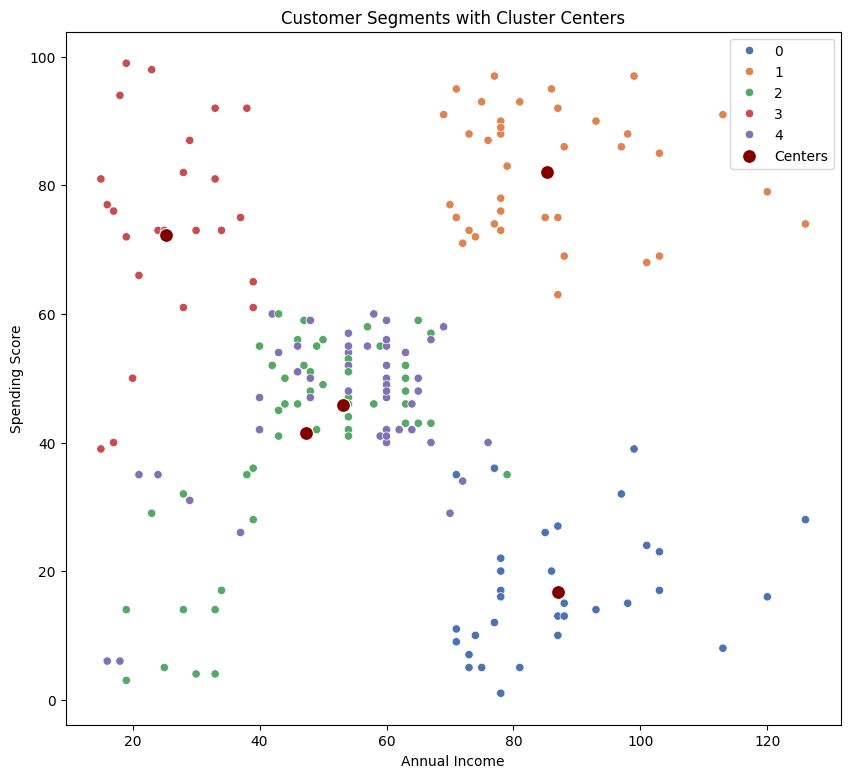

In [4]:
# Getting cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  #transforming the scaled cluster centers back to the original scale
center_df = pd.DataFrame(centers, columns=features.columns)  #Storing cluster centers in the data frame

# Plotting the centers of each clusters
plt.figure(figsize=(10, 9))
sns.scatterplot(data=data, x='Annual Income', y='Spending Score', hue='Cluster', palette='deep')   #Plotting scatterplot of Annual Income and Spending Score
sns.scatterplot(x=center_df['Annual Income'], y=center_df['Spending Score'], s=100, color='maroon', label='Centers') #Plotting cluster centers
plt.title('Customer Segments with Cluster Centers')
plt.legend()
plt.show()
